___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df1 = df

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

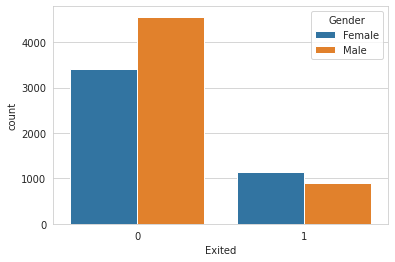

In [ ]:
sns.countplot(x="Exited",hue='Gender', data=df)

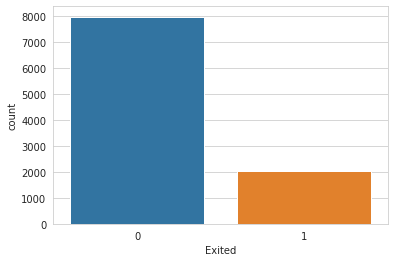

In [ ]:
sns.countplot(df["Exited"])

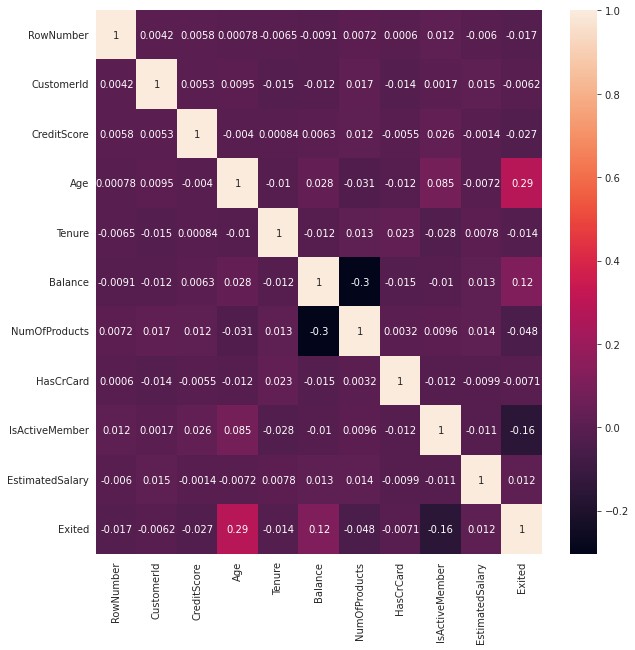

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
drop_list = ["RowNumber", "Surname", "Geography"]

In [ ]:
df=df.drop(drop_list, axis=1)

In [ ]:
df=df.drop("Gender", axis=1)

In [ ]:
df=df.drop("CustomerId", axis=1)

In [ ]:
df.shape

(10000, 9)

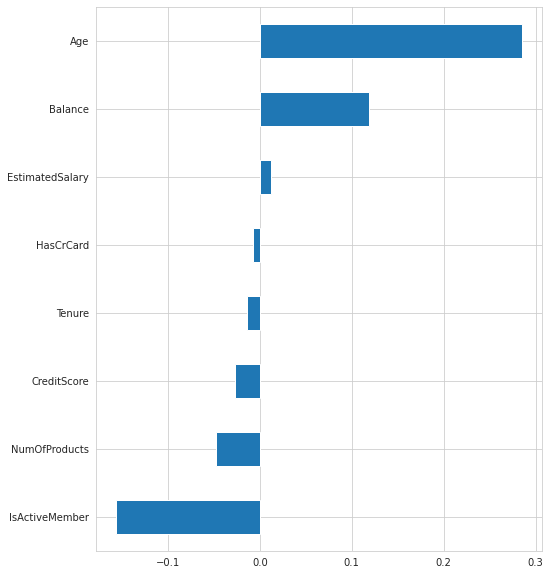

In [ ]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [ ]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


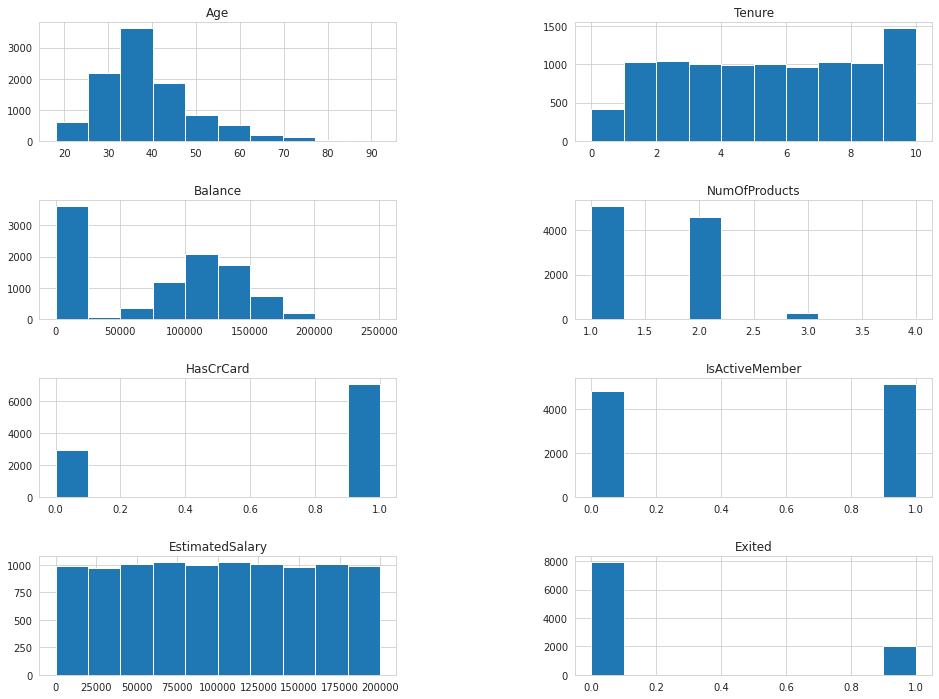

In [ ]:
r = len(df.columns[1:])//2+ 1*(len(df.columns[1:])%2==1)
c = 2
r,c

fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
seed = 42

-- Data imbalanced degilse de stratify kullanilabilir --

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.35, random_state = seed)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   # classification metricleri
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

### without class_weigth

In [ ]:
tf.__version__      # tensorflow version

'2.8.0'

In [ ]:
X_train.shape

(6500, 8)

In [ ]:
X_test.shape

(3500, 8)

Ilk giriste modele 9 feature (input) gelecek. Ilk hidden layer' da 14 nöron ile basladik. Nöron sayisi icin kesin bir sayi yok ama arastirmalara gore feature sayisinin 1.5 kati ile baslanabilir. Biz 30 ile baslayip yariya indirerek gittik.

ANN' de hidden layer' larda aktivasyon fonksiyonu olarak __relu__ secmek, Tanh ve sigmoid' e gore daha hizli sonuca ulasmayi sagliyor. 

Output layer' da aktivasyon fonksiyonu __sigmoid__ cunku binary bir classification yapacagiz. (Regression datasinda outputtaki aktivasyon fonksiyonuna bir sey yazmamistik bu yuzden default deger olan __linear__ secilmisti.)

Datamiz binary classification oldugu icin model.compile kisminda __binary_crossentropy__ sectik ve gormek istedigimiz skor metriklerini yazdik. (Virgul ile diger metrikleri de ekleyebiliriz (recall, f1 score gibi))

__input_dim__ ilk satira yazildigi icin agirlik atamasi bu asamada yapildi. Yazilmasa da olurdu fakat o zaman agirlik atamasi fit islemi esnasinda olurdu :

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Yukarida structure kurduk. Asagida ise modelin egitim esnasinda kullanacagi sistemi belirledik :

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit' in icinde shuffle diye bir parametre var ve bunun default degeri 'True'. Bunun anlami; 'Her epoch isleminden sonra datayi yeniden kar.' (RNN' de shuffle' i False yapacagiz)

__validation_split__ ile train datasinin __son__ kisminin 0.14' ü alindi. Bunun haricinde kalan data her epoch' tan sonra datayi yeniden karılacak.

batch_size = 260, datadaki sample sayisi = 6500 __--->__ Yani her epoch' ta 6500 / 260 = 25 islem olacak.

__Asagida yapilan islem__ Bir epoch icin ---> Her batch_size' da bir (260 satirda bir) backpropagation yapacak sekilde tum datayi 25 islem ile egitime soktu, loss ve accuracy skorlarini aldi. __(Buradaki loss ve accuracy skorlari her epoch' taki 25. islemin sonuclari)__ 

val_los ve val_accuracy skorlarini ise bir epoch' taki 25 islemin hepsi bittikten sonra buluyor.

__val_loss :__ Cost function' in sonucudur, azalmasi gerekir. Validation datasi ile alinan skorlari verir. Train datasi ile bir epoch' taki egitim biter, bulunan agirlik degerleri ile validation datasi egitime girer.

__val_accuracy :__ Validation datasina ait accuracy skordur. val_los yani hata azaldikca accuracy skoru artar.

#### Evaluate

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.14, batch_size = 260, epochs = 2000, verbose=1)

Epoch 1/2000
22/22 [==============================] - 1s 11ms/step - loss: 0.5964 - accuracy: 0.7959 - val_loss: 0.5709 - val_accuracy: 0.7956
Epoch 2/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.7964 - val_loss: 0.5372 - val_accuracy: 0.7956
Epoch 3/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7964 - val_loss: 0.5229 - val_accuracy: 0.7956
Epoch 4/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7964 - val_loss: 0.5122 - val_accuracy: 0.7956
Epoch 5/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7964 - val_loss: 0.5044 - val_accuracy: 0.7956
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.7964 - val_loss: 0.4981 - val_accuracy: 0.7956
Epoch 7/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7964 - val_loss: 0.4932 - val_accuracy: 0.7956
Epoch

2000 * 22 = 44000  kere backpropagation oldu (agirliklar guncellendi).

Modelde 239 tane parametre var :

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                126       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


Yukarida aldigimiz skorlari dataframe cevirerek inceledik. loss ve val_loss hata skorlarinin gittikce azaldigini, accuracy ve val_accuracy skorlarinin ise egitim ilerledikce arttigini goruyoruz.

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.596,0.796,0.571,0.796
1,0.550,0.796,0.537,0.796
2,0.527,0.796,0.523,0.796
3,0.515,0.796,0.512,0.796
4,0.506,0.796,0.504,0.796


History ile aldigimiz degerleri gorsele aktardik. Alt ve ust kisimlarin ikisinde de bir overfit durumu söz konusu.

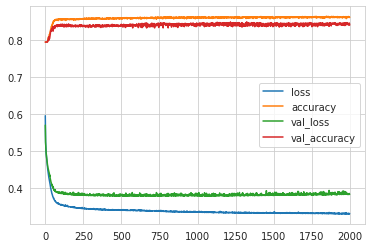

In [ ]:
loss_df.plot();

-- __verbose__ bilgisayarin arkada hangi islemleri yaptiginin ayrintisini verir. Eger 0 dersek bize bu islemleri gostermez. --

Modelimiz egitildikten sonra X_test ve y_test' i modelimize soktuk. Asagida aldigimiz ciktilar, test datalarinin aldigi __loss function__ ve __accuracy__ degerleri. Yukarida modeli kurarken recall' i da eklemis olsaydik burada 3 cikti alacaktik:

In [ ]:
model.evaluate(X_test, y_test, verbose=0)  

[0.3588966131210327, 0.8517143130302429]

Yukarida aldigimiz ciktilara asagida isim vererek daha anlasilir hale getirdik :

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3588966131210327
accuracy :  0.8517143130302429


__y_pred = model.predict_classes(X_test) --->__ tensorflow 2.5' e kadar bu fonksiyon kullaniliyordu, sonradan bu fonksiyon kalkti. Bu fonksiyon classification datalarinda, buldugu olasilik degerlerini 0.5' in altinda ise 0' a; 0.5' in ustunde ise 1'e atayarak veriyordu. Yeni surumlerde kullanilan __y_pred = (model.predict(X_test)__ ise sadece predict uretiyor. Bu yuzden kendimiz manuel olarak __>0.5__ ise 1 sinifina ata diyerek atama islemini kendimiz yapiyoruz __(y_pred = (model.predict(X_test) > 0.5))__ :

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2636  151]
 [ 368  345]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2787
           1       0.70      0.48      0.57       713

    accuracy                           0.85      3500
   macro avg       0.79      0.71      0.74      3500
weighted avg       0.84      0.85      0.84      3500



In [ ]:
model.predict(X_test)

# Yukaridaki predict' in aciklamasi. Model bize 0 ile 1 arasinda predict' ler uretti.
# Onceki yontemde (predict_classes) 0.5'ten kucuk olanlari 0 classina buyuk olanlari 1 classina atiyordu.
# Burda atama yok, sadece degerler var.

array([[0.01990449],
       [0.09178555],
       [0.2958861 ],
       ...,
       [0.13817057],
       [0.18091029],
       [0.11192912]], dtype=float32)

In [ ]:
model.predict(X_test)>0.5

# Yeni yontemde >0.5 diyerek bu islemi manuel olarak yapiyoruz.
# ML' de predict_proba 0 ve 1 olma olasiligini döndürüyordu ve biz index'le hangi olasiligi istiyorsak aliyorduk.
# Burda ise bu kodla sadece 1 olma olasiligini döndürüyor. (Binary classification icin)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train),y = y_train)
class_weights = dict(zip(np.unique(y_train), class_weights)),
class_weights

({0: 0.6278979907264297, 1: 2.4546827794561934},)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Yukarida structure kurduk. Asagida ise modelin egitim esnasinda kullanacagi sistemi belirledik :

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Evaluate

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.14, batch_size = 260, epochs = 2000, verbose=1,
          class_weight ={0 :class_weights[0][1],
                        1: class_weights[0][0]})

Epoch 1/2000
22/22 [==============================] - 1s 18ms/step - loss: 1.0654 - accuracy: 0.7959 - val_loss: 0.5695 - val_accuracy: 0.7956
Epoch 2/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.8207 - accuracy: 0.7964 - val_loss: 0.5425 - val_accuracy: 0.7956
Epoch 3/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.7964 - val_loss: 0.5636 - val_accuracy: 0.7956
Epoch 4/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.5522 - accuracy: 0.7964 - val_loss: 0.6029 - val_accuracy: 0.7956
Epoch 5/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.5216 - accuracy: 0.7964 - val_loss: 0.6326 - val_accuracy: 0.7956
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.7964 - val_loss: 0.6465 - val_accuracy: 0.7956
Epoch 7/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.5041 - accuracy: 0.7964 - val_loss: 0.6436 - val_accuracy: 0.7956
Epoch

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                126       
                                                                 
 dense_4 (Dense)             (None, 7)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.065,0.796,0.570,0.796
1,0.821,0.796,0.542,0.796
2,0.638,0.796,0.564,0.796
3,0.552,0.796,0.603,0.796
4,0.522,0.796,0.633,0.796


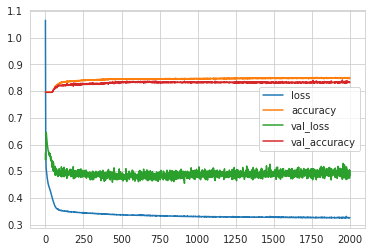

In [ ]:
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4255635142326355
accuracy :  0.8454285860061646


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2763   24]
 [ 517  196]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2787
           1       0.89      0.27      0.42       713

    accuracy                           0.85      3500
   macro avg       0.87      0.63      0.67      3500
weighted avg       0.85      0.85      0.81      3500



### EarlyStopping

Yukarida olusturdugumuz modeli aynen kurup ek olarak early_stop ekleyip model performansina bakacagiz :

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

Bir degisken icine bir object olusturarak EarlyStop fonksiyonunu tanimladik. EarlyStop yapmasi icin hangi veriyi takip etmesi gerektigini __monitor__ parametresi icine tanimladik (val_loss dedik, val_accuracy de diyebilirdik. Onemli olan validation datasinin aldigi skorlari takip etmek).

__patience=25 --->__ 25 satir boyunca skorlar degismezse dur.

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

Early stop ile modelimizi calistirdik :

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.14, batch_size = 260, epochs = 2000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/2000
22/22 [==============================] - 1s 11ms/step - loss: 0.5964 - accuracy: 0.7959 - val_loss: 0.5709 - val_accuracy: 0.7956
Epoch 2/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.7964 - val_loss: 0.5372 - val_accuracy: 0.7956
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.5265 - accuracy: 0.7964 - val_loss: 0.5229 - val_accuracy: 0.7956
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7964 - val_loss: 0.5122 - val_accuracy: 0.7956
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.7964 - val_loss: 0.5044 - val_accuracy: 0.7956
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.7964 - val_loss: 0.4981 - val_accuracy: 0.7956
Epoch 7/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7964 - val_loss: 0.4932 - val_accuracy: 0.7956
Epoch

Yukaridaki modeldeki gorselde x eksenindeki deger 2000' e kadar gitmisti yani 2000 epoch boyunca calismisti. Early stop ile tanimladigimiz bu modelde ise epoch degeri 250 civarlarinda iken egitim tamamlandi :

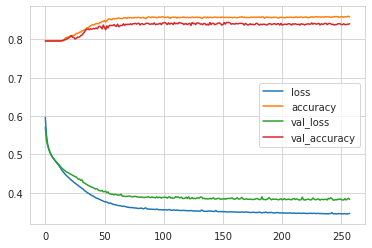

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Early stop kullanarak aldigimiz skorlar oncesine gore yukseldi. Cunku modelimiz overfit'e gitmisti, earl stop ile bunu engelledik :

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3552604615688324
accuracy :  0.8585714101791382


__weighted_avg__ ile sayisi fazla olan class' a ait skorlar agirlikli olarak temsil edilir. Eger sayisi fazla olan class degerleri bizim icin onemliyse bu skoru baz almak gerekir. Sayisi az olan class' i on plana cikarmak istiyorsak ise __macro__ skoruna bakmaliyiz.

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2698   89]
 [ 406  307]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2787
           1       0.78      0.43      0.55       713

    accuracy                           0.86      3500
   macro avg       0.82      0.70      0.73      3500
weighted avg       0.85      0.86      0.84      3500



### learning_rate

Yukarida early stop ile olusturdugumuz modele learning_rate parametresini ekleyerek skorlarimizdaki degisimleri gozlemleyecegiz :

In [ ]:
from tensorflow.keras.optimizers import Adam

Adam' in icine learning rate tanimlayacagimiz icin Adam' i import ettik. (compile icine tanimlarken import etmeye gerek yok)

Yukaridaki model ile ayni islemleri yaptik. Sadece default degeri 0.001 olan learning_rate' i 0.005 yaparak atacagimiz adimlarin buyukluklerini 5 kat artirdik ve bunu bir degiskene atadik. optimizer icine ise bu degiskeni verdik. __(learning_rate ile adimlar buyudugu icin global min' e daha hizli ulasma ihtimali artar, tasarruf saglanir)__ : 

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.006)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

early_stop sayesinde egitimimiz 71. epoch' ta tamamlandi :

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.14, batch_size = 260, epochs = 2000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/2000
22/22 [==============================] - 1s 11ms/step - loss: 0.5225 - accuracy: 0.7961 - val_loss: 0.4981 - val_accuracy: 0.7956
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.7964 - val_loss: 0.4764 - val_accuracy: 0.7956
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.7977 - val_loss: 0.4600 - val_accuracy: 0.7956
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4378 - accuracy: 0.8075 - val_loss: 0.4373 - val_accuracy: 0.8198
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8277 - val_loss: 0.4160 - val_accuracy: 0.8319
Epoch 6/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.8428 - val_loss: 0.4073 - val_accuracy: 0.8308
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8519 - val_loss: 0.3985 - val_accuracy: 0.8374
Epoch

Onceki derste kurdugumuz regression modelindeki gibi eger 1000 epoch boyunca herhangi bir overfit durumu yoksa early stop' tan once learning rate parametresi ile oynamak mantikli olur; overfit tehlikesi olmadigi icin adimlarimizi buyuterek modeli iyilestirme yoluna gidebiliriz. Fakat burda kurdugumuz modelde overfit tehlikesi oldugu icin oncelikle early stop parametresi ile oynamak daha mantikli olur. Bu yuzden onceki datasetinde ilk olarak learning rate' i, sonra early stop' u degistirdik; bu datasetinde ise once early stop' u degistirerek overfit tehlikesini ortadan kaldirdik, sonrasinda learning rate ile iyilestirme yoluna gittik :

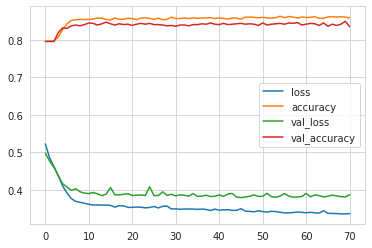

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36507415771484375
accuracy :  0.8485714197158813


learning_rate artirildigi icin egitim daha hizli yapildi. Skorlarimiz learning_rate=0.001' e gore biraz dustu. Yukaridaki model daha az hata yapmisti, buradaki model ise daha çok hata yapti (Boyle bir model icin learning_rate parametresi ile oynamaya gerek yok) :

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2606  181]
 [ 349  364]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2787
           1       0.67      0.51      0.58       713

    accuracy                           0.85      3500
   macro avg       0.77      0.72      0.74      3500
weighted avg       0.84      0.85      0.84      3500



## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

ML' deki SVM modellerde hyperparametreler ile oynamak (GridSearch) onemliydi cunku kerneli degistiriyorduk, model kernel' e gore farkli sonuclar veriyordu. Burada da ayni SVM gibi model skorunu etkileyebilecek cok fazla degisken var. Bu yuzden DL modellerinde de GridSearch cok onemli.

__--__ random.set_seed uygulansa bile GridSearch islemlerinde farkli skorlar alinabilir. Bu yuzden birkac kere model calistirilip en iyi skoru veren model secilebilir.  __--__

def fonksiyonu icine optimizer ve learn_rate' i degisken olarak tanimladik; compile icinde de optimizer icine learning rate' i verdik (def fonksiyonu icinde nöron sayilari da tanimlanarak makine gücüne göre farkli nöron sayilari denenebilir.Yukaridaki makalede örnekleri var) :

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dense(units = 7, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

GridSearch' te EarlyStop kullanilip kullanilmamasi durumu tartismali bir konudur. Bazi makalelerde kullanilmamasi önerilir. Bizim modelimizde yaptigimiz gibi eger epoch sayisi sabitlendiyse (biz 2000 epoch olarak sabitledik) ve bu sayi GridSearch isleminde degistirilmeyecekse early stop kullanilabilir. Eger early stop kullanmazsak model overfite gidebilir ve skorlar dusebilir.

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 25)

Early stop kullandigimiz icin validation_split de vermemiz gerekti (validation split' e gore 15 adim boyunca skorlar duzelmezse egitimi durduracak)

In [ ]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier,validation_split = 0.14, epochs = 2000)

parameters = {'batch_size': [260, 520],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/2000
22/22 [==============================] - 1s 11ms/step - loss: 0.5467 - accuracy: 0.7962 - val_loss: 0.5098 - val_accuracy: 0.7956
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.7964 - val_loss: 0.4847 - val_accuracy: 0.7956
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7964 - val_loss: 0.4712 - val_accuracy: 0.7956
Epoch 4/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7991 - val_loss: 0.4564 - val_accuracy: 0.8000
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8066 - val_loss: 0.4510 - val_accuracy: 0.8033
Epoch 6/2000
22/22 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8113 - val_loss: 0.4410 - val_accuracy: 0.8110
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4211 - a

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f562b4c1e90>,
             n_jobs=-1,
             param_grid={'batch_size': [260, 520],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

ML modellerindeki gibi best score ve best parametrelere bakabiliyoruz :

In [ ]:
grid_model.best_score_

0.8546153846153846

In [ ]:
grid_model.best_params_

{'batch_size': 260,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [ ]:
#grid_model.cv_results_   

#Tum sonuclari verir, okumasi kolay degil. Bu yuzden asagida DataFrame' e cevirdik.

Alinan skorlar arasinda "ort. test skor, ort. std, en iyi skoru kacinci derecede aldigi, hangi parametreleri secmis" bilgilerine DataFrame ile  baktik :

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.837,0.029,14,"{'batch_size': 260, 'learn_rate': 0.001, 'opti..."
1,0.828,0.025,15,"{'batch_size': 260, 'learn_rate': 0.001, 'opti..."
2,0.675,0.237,21,"{'batch_size': 260, 'learn_rate': 0.001, 'opti..."
3,0.845,0.022,11,"{'batch_size': 260, 'learn_rate': 0.001, 'opti..."
4,0.854,0.022,2,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
5,0.851,0.020,5,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
6,0.797,0.017,18,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
7,0.853,0.019,4,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
8,0.851,0.024,6,"{'batch_size': 260, 'learn_rate': 0.005, 'opti..."
9,0.844,0.017,12,"{'batch_size': 260, 'learn_rate': 0.005, 'opti..."


Yukaridaki sonuclarin rank_test_score' a gore siralanmasini istedik :

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
11,0.855,0.019,1,"{'batch_size': 260, 'learn_rate': 0.005, 'opti..."
4,0.854,0.022,2,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
19,0.853,0.021,3,"{'batch_size': 520, 'learn_rate': 0.003, 'opti..."
7,0.853,0.019,4,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
5,0.851,0.020,5,"{'batch_size': 260, 'learn_rate': 0.003, 'opti..."
8,0.851,0.024,6,"{'batch_size': 260, 'learn_rate': 0.005, 'opti..."
17,0.850,0.023,7,"{'batch_size': 520, 'learn_rate': 0.003, 'opti..."
21,0.849,0.015,8,"{'batch_size': 520, 'learn_rate': 0.005, 'opti..."
20,0.848,0.027,9,"{'batch_size': 520, 'learn_rate': 0.005, 'opti..."
23,0.847,0.025,10,"{'batch_size': 520, 'learn_rate': 0.005, 'opti..."


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## Final Model and Model Deployment

Yine X_train ve y_train' i kullanacagimiz icin final modelde de yukarida olusturdugumuz scaler' i pickle ile dump ettik :

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_Exited", 'wb'))

Yukarida aldigimiz en iyi degerler ile final modelimizi kurduk :

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

Final modelde yukaridaki modellerden farkli olarak __validation_split__ yerine __validation_data__ kullandik. validation_data' da X_train ve y_train' in son kismindan belirtilen miktar kadarini validation' a ayirir; validation_datada ise X_test ve y_test validation datasi olarak kullanilir.

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 260, epochs = 2000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/2000
25/25 [==============================] - 1s 11ms/step - loss: 0.5378 - accuracy: 0.7960 - val_loss: 0.5010 - val_accuracy: 0.7963
Epoch 2/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.7963 - val_loss: 0.4808 - val_accuracy: 0.7963
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7963 - val_loss: 0.4642 - val_accuracy: 0.7963
Epoch 4/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7968 - val_loss: 0.4510 - val_accuracy: 0.8020
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.4479 - accuracy: 0.8008 - val_loss: 0.4358 - val_accuracy: 0.8160
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8069 - val_loss: 0.4188 - val_accuracy: 0.8143
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8125 - val_loss: 0.4076 - val_accuracy: 0.8257
Epoch

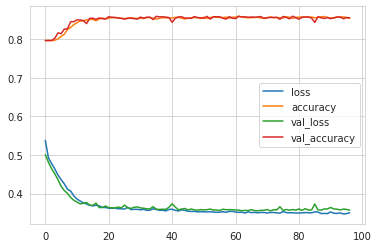

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35712695121765137
accuracy :  0.8551428318023682


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2686  101]
 [ 406  307]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2787
           1       0.75      0.43      0.55       713

    accuracy                           0.86      3500
   macro avg       0.81      0.70      0.73      3500
weighted avg       0.85      0.86      0.84      3500



In [ ]:
model.save('model_Exited.h5')

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

Kaydettigimiz model ve scaler' i prediction almak uzere tekrar load ettik.

In [ ]:
model_Exited = load_model('model_Exited.h5')
scaler_Exited = pickle.load(open("scaler_Exited", "rb"))

### Prediction

Target label olan Cancer sütununu datadan atarak datadaki ilk satiri prediction' da kullanmak uzere cektik ve bunu modele vermeden önce transform ile scale islemini uyguladik :

In [ ]:
Exited_cust = df.drop('Exited', axis = 1).iloc[50:60, :]
Exited_cust

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
50,698,44,10,116363.370,2,1,0,198059.160
51,585,36,5,146050.970,2,0,0,86424.570
52,788,33,5,0.000,2,0,0,116978.190
53,655,41,8,125561.970,1,0,0,164040.940
54,601,42,1,98495.720,1,1,0,40014.760
55,619,43,1,125211.920,1,1,1,113410.490
56,656,45,5,127864.400,1,1,0,87107.570
57,725,19,0,75888.200,1,0,0,45613.750
58,511,66,4,0.000,1,1,0,1643.110
59,614,51,4,40685.920,1,1,1,46775.280


DL modelleri scale edilmis array seklindeki data ile calisir :

In [ ]:
Exited_cust = scaler_Exited.transform(Exited_cust)
Exited_cust

array([[0.696     , 0.35135135, 1.        , 0.52526475, 0.33333333,
        1.        , 0.        , 0.99033248],
       [0.47      , 0.24324324, 0.5       , 0.6592747 , 0.33333333,
        0.        , 0.        , 0.43210622],
       [0.876     , 0.2027027 , 0.5       , 0.        , 0.33333333,
        0.        , 0.        , 0.58488891],
       [0.61      , 0.31081081, 0.8       , 0.56678727, 0.        ,
        0.        , 0.        , 0.82022513],
       [0.502     , 0.32432432, 0.1       , 0.4446101 , 0.        ,
        1.        , 0.        , 0.200035  ],
       [0.538     , 0.33783784, 0.1       , 0.56520714, 0.        ,
        1.        , 1.        , 0.5670487 ],
       [0.612     , 0.36486486, 0.5       , 0.57718044, 0.        ,
        1.        , 0.        , 0.43552154],
       [0.75      , 0.01351351, 0.        , 0.34255966, 0.        ,
        0.        , 0.        , 0.22803263],
       [0.322     , 0.64864865, 0.4       , 0.        , 0.        ,
        1.        , 0.      

Prediction asamasinda yine >0.5' i belirtiyoruz. 0.5' in uzerinde bir deger cikarsa 1 class' ina; cikmazsa 0 class' ina atama yapacak :

In [ ]:
predicted_sample = pd.DataFrame(model_Exited.predict(Exited_cust) > 0.5).astype("int32").rename({0: 'Predicted Sample'}, axis=1)
predicted_sample
#model_Exited.predict_classes(Exited_cust)

,Predicted Sample
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


Prediction ile gercek degeri kiyasladik, ayni sonuc cikti. Roc/Auc' da aldigimiz yuksek skorlar bize 1 ve 0 class' inin ayriminin iyi yapildigi inside' ini vermisti:

In [ ]:
actual_sample = pd.DataFrame(df["Exited"].iloc[50:60]).rename({'Exited': 'Actual Sample'}, axis=1)
actual_sample

,Actual Sample
50,0
51,0
52,0
53,1
54,1
55,0
56,0
57,0
58,1
59,0


In [ ]:
pred_df['Prediction Accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['Actual Sample'] == x['Predicted Sample']) else "Wrong Pred", axis=1)

def color_positive_green(val):
    if val == 'Correct Pred':
        color = 'green'
    elif val == 'Wrong Pred':
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color
 
pred_df.style.applymap(color_positive_green)

,Actual Sample,Predicted Sample,Prediction Accuracy
50,0,0,Correct Pred
51,0,0,Correct Pred
52,0,0,Correct Pred
53,1,0,Wrong Pred
54,1,0,Wrong Pred
55,0,0,Correct Pred
56,0,1,Wrong Pred
57,0,0,Correct Pred
58,1,1,Correct Pred
59,0,0,Correct Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___